### Impport libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Impport Dataset

In [12]:
df = pd.read_csv('Market_Basket_Optimisation.csv', header=None)

### Visualising items' frequencies

<Axes: title={'center': 'Frequency'}>

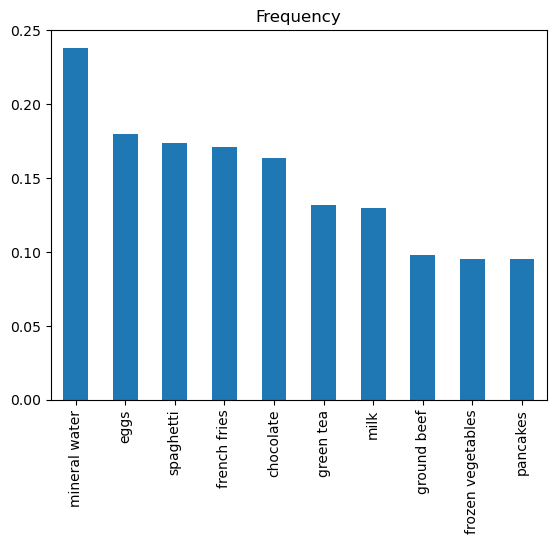

In [14]:
df.stack().value_counts().apply(lambda item: item / df.shape[0])[:10].plot(kind='bar', title='Frequency') # Frequency

<Axes: title={'center': 'Relative Frequency'}>

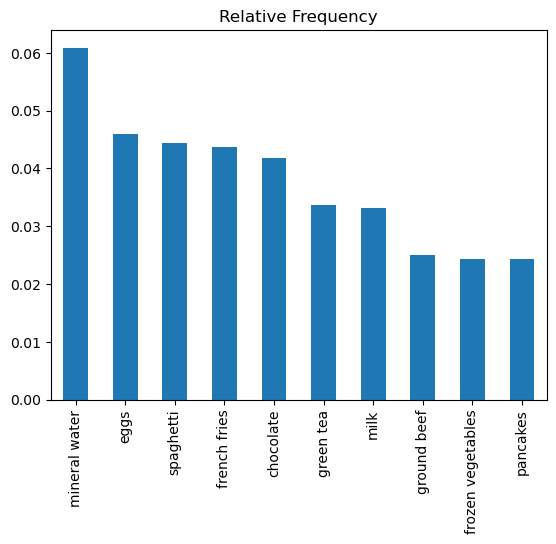

In [15]:
df.stack().value_counts(normalize=True)[:10].plot(kind='bar', title='Relative Frequency')

### Formatting the dataset

In [16]:
transactions = []
for i in range(df.shape[0]):
    row = df.iloc[i].dropna().tolist()
    transactions.append(row)

### Building the model

In [17]:
import sys
from apyori import apriori
rules = apriori(transactions=transactions, 
                min_support=0.004, # how frequent is your item(s) in the dataset
                min_length=2, 
                max_length=0)
results = list(rules)

### Organizing the model's output

In [18]:
def inspect(results):
    item_sets = []
    supports = [] 
    for result in results:
        item_sets.append(tuple(result[0]))
        supports.append(result[1])
    return list(zip(item_sets, supports))
results_df = pd.DataFrame(inspect(results),
                          columns = ['Item Set', 'Support'])

In [19]:
pd.set_option('display.max_rows', df.shape[0])
results_df.sort_values('Support', ascending=False)[:100]

,Item Set,Support
69,"(mineral water,)",0.238368
34,"(eggs,)",0.179709
96,"(spaghetti,)",0.174110
40,"(french fries,)",0.170911
23,"(chocolate,)",0.163845
51,"(green tea,)",0.132116
68,"(milk,)",0.129583
52,"(ground beef,)",0.098254
46,"(frozen vegetables,)",0.095321
78,"(pancakes,)",0.095054
